In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


**Binary logistic regression**

In [2]:
import os
import pandas as pd
from IPython.display import display, HTML

# Define scrollable table style for Jupyter Notebook output
style = """
<style>
.output_scroll {
    overflow-x: auto;
}
</style>
"""
display(HTML(style))

# Get all CSV files in the current directory
csv_files = [f for f in os.listdir('.') if f.endswith('.csv')]

# List of common text encodings to try
encodings = ['utf-8', 'latin1', 'cp1252', 'gbk']

# Try reading each CSV file with different encodings
for file in csv_files:
    df = None
    used_encoding = None
    for enc in encodings:
        try:
            # Try to read the CSV file with the current encoding
            df = pd.read_csv(file, encoding=enc)
            used_encoding = enc
            break  # Stop trying encodings once it succeeds
        except:
            continue  # Try the next encoding if reading fails

    # Display file name and detected encoding (or failure notice)
    display(HTML(f"<h4>{file} (Encoding: {used_encoding if used_encoding else '❌ Unreadable'})</h4>"))
    
    if df is not None:
        # Show the first few rows of the DataFrame
        display(df.head())
    else:
        # Show an error message if reading failed
        display(HTML("<p style='color:red;'>Failed to read the file with all attempted encodings.</p>"))


,Year,Datetime,Stage,Stadium,City,Hometeamname,Hometeamgoals,Awayteamgoals,Awayteamname,Winconditions,...,Assistant1,Assistant2,Roundid,Matchid,Hometeaminitials,Awayteaminitials,latitude,longitude,koppen_code,koppen_desc
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,...,CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,-34.905892,-56.19131,Cfa,Humid subtropical climates
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,...,MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL,-34.905892,-56.19131,Cfa,Humid subtropical climates
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,...,VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA,-34.905892,-56.19131,Cfa,Humid subtropical climates
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,...,LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER,-34.905892,-56.19131,Cfa,Humid subtropical climates
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,...,SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA,-34.905892,-56.19131,Cfa,Humid subtropical climates


,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


,Year,HostCountry,Winner,Second,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,HostContinent,WinnerContinent
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549,America,America
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000,Europe,Europe
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700,Europe,Europe
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246,America,America
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607,Europe,Europe


In [3]:
# Ensure that pandas displays full tables: no column truncation or abbreviation
pd.set_option('display.max_columns', None)      # Show all columns
pd.set_option('display.width', None)            # Auto-adjust display width to avoid wrapping
pd.set_option('max_colwidth', None)             # Show full content of each cell

# Re-read all CSV files and display the first 5 rows of each using full HTML table rendering
for file in csv_files:
    df = None
    used_encoding = None
    for enc in encodings:
        try:
            # Try reading the file with the current encoding
            df = pd.read_csv(file, encoding=enc)
            used_encoding = enc
            break  # Stop trying if read is successful
        except:
            continue  # Try the next encoding if reading fails

    # Display the file name and the encoding used (or a failure notice)
    display(HTML(f"<h4>{file} (Encoding used: {used_encoding if used_encoding else '❌ Unreadable'})</h4>"))
    
    if df is not None:
        # Convert the first 5 rows to a full HTML table with unescaped content (e.g., HTML tags if any)
        html_table = df.head().to_html(escape=False, index=False)
        display(HTML(html_table))  # Render the table using HTML
    else:
        # Display an error message if the file couldn't be read with any encoding
        display(HTML("<p style='color:red;'>Failed to read this file using all attempted encodings.</p>"))


Year,Datetime,Stage,Stadium,City,Hometeamname,Hometeamgoals,Awayteamgoals,Awayteamname,Winconditions,Attendance,Halftimehomegoals,Halftimeawaygoals,Referee,Assistant1,Assistant2,Roundid,Matchid,Hometeaminitials,Awayteaminitials,latitude,longitude,koppen_code,koppen_desc
1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,-34.905892,-56.19131,Cfa,Humid subtropical climates
1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL,-34.905892,-56.19131,Cfa,Humid subtropical climates
1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA,-34.905892,-56.19131,Cfa,Humid subtropical climates
1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER,-34.905892,-56.19131,Cfa,Humid subtropical climates
1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA,-34.905892,-56.19131,Cfa,Humid subtropical climates


RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


Year,HostCountry,Winner,Second,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,HostContinent,WinnerContinent
1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549,America,America
1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000,Europe,Europe
1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700,Europe,Europe
1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246,America,America
1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607,Europe,Europe


In [4]:
# Show column titles of each CSV file
for file in csv_files:
    headers = None
    for enc in encodings:
        try:
            df = pd.read_csv(file, encoding=enc, nrows=0)  # Read only header
            headers = df.columns.tolist()
            break
        except:
            continue

    print(f"\n📄 Column titles of {file}:")
    if headers:
        print(headers)
    else:
        print(" Failed to read headers with all encodings.")



📄 Column titles of WorldCupMatches.csv:
['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Hometeamname', 'Hometeamgoals', 'Awayteamgoals', 'Awayteamname', 'Winconditions', 'Attendance', 'Halftimehomegoals', 'Halftimeawaygoals', 'Referee', 'Assistant1', 'Assistant2', 'Roundid', 'Matchid', 'Hometeaminitials', 'Awayteaminitials', 'latitude', 'longitude', 'koppen_code', 'koppen_desc']

📄 Column titles of WorldCupPlayers.csv:
['RoundID', 'MatchID', 'Team Initials', 'Coach Name', 'Line-up', 'Shirt Number', 'Player Name', 'Position', 'Event']

📄 Column titles of WorldCupsSummary.csv:
['Year', 'HostCountry', 'Winner', 'Second', 'Third', 'Fourth', 'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance', 'HostContinent', 'WinnerContinent']


In [11]:

import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

# Read CSV with automatic encoding detection
def read_csv_with_encoding(file):
    for enc in ['utf-8', 'latin1', 'cp1252', 'gbk']:
        try:
            return pd.read_csv(file, encoding=enc)
        except:
            pass
    raise ValueError(f"Failed to read file: {file}")

# Load datasets
df_match   = read_csv_with_encoding('WorldCupMatches.csv')
df_summary = read_csv_with_encoding('WorldCupsSummary.csv')


In [12]:
# ─── Cell 2: Feature Engineering + Merge ───────────────────────────────

# Create target: 1 if home team wins, else 0
df_match['home_win'] = (df_match['Hometeamgoals'] > df_match['Awayteamgoals']).astype(int)

# Clean whitespace in relevant string columns
for c in ['Winner', 'Second', 'Third', 'Fourth', 'HostCountry']:
    df_summary[c] = df_summary[c].str.strip()
for c in ['Hometeamname', 'Awayteamname']:
    df_match[c] = df_match[c].str.strip()

# Merge match data with tournament summary on 'Year'
df = df_match.merge(df_summary, on='Year', how='left')

# Add dynamic features based on match outcomes
df['home_is_winner'] = (df['Hometeamname'] == df['Winner']).astype(int)
df['away_is_winner'] = (df['Awayteamname'] == df['Winner']).astype(int)
df['home_is_host']   = (df['Hometeamname'] == df['HostCountry']).astype(int)
df['away_is_host']   = (df['Awayteamname'] == df['HostCountry']).astype(int)
df['knockout']       = df['Stage'].apply(lambda x: 0 if 'Group' in str(x) or 'First' in str(x) else 1)

# Flag strong teams
strong = ['Brazil','Germany','Argentina','France','Italy','England','Spain','Netherlands','Portugal']
df['home_strong'] = df['Hometeamname'].isin(strong).astype(int)
df['away_strong'] = df['Awayteamname'].isin(strong).astype(int)

# One-hot encode climate types (Köppen codes)
df = pd.get_dummies(df, columns=['koppen_code'], drop_first=True)

# Select final feature columns
desired = [
    'Attendance','knockout',
    'home_is_winner','away_is_winner',
    'home_is_host','away_is_host',
    'home_strong','away_strong'
]
features = [c for c in desired if c in df.columns] + \
           [c for c in df.columns if c.startswith('koppen_code_')]

# Drop rows with missing values in required features or target
df = df.dropna(subset=features + ['home_win'])

# Extract feature matrix and target vector
X = df[features].values.astype(np.float32)
y = df['home_win'].values.astype(np.int64)


In [13]:

# Standardize 'Attendance' if present
if 'Attendance' in features:
    idx = features.index('Attendance')
    mu, std = X[:, idx].mean(), X[:, idx].std()
    X[:, idx] = (X[:, idx] - mu) / std

# Convert numpy arrays to PyTorch tensors
X_t = torch.from_numpy(X)
y_t = torch.from_numpy(y)

# Shuffle and split dataset: 80% train, 20% test
n = len(X_t)
idx = torch.randperm(n)
split = int(n * 0.8)
train_idx, test_idx = idx[:split], idx[split:]

# Create datasets and data loaders
train_ds = TensorDataset(X_t[train_idx], y_t[train_idx])
test_ds  = TensorDataset(X_t[test_idx],  y_t[test_idx])
train_dl = DataLoader(train_ds, batch_size=16, shuffle=True)
test_dl  = DataLoader(test_ds,  batch_size=16)


In [14]:


# Define a simple logistic regression model
model = nn.Sequential(
    nn.Linear(X.shape[1], 1),
    nn.Sigmoid()
)

# Binary cross-entropy loss function
loss_fn = nn.BCELoss()

# Stochastic Gradient Descent optimizer
opt = torch.optim.SGD(model.parameters(), lr=0.1)

# Train for 100 epochs
for epoch in range(100):
    for xb, yb in train_dl:
        preds = model(xb).squeeze(1)         # Predict probabilities
        loss = loss_fn(preds, yb.float())    # Compute loss
        opt.zero_grad()
        loss.backward()
        opt.step()


In [15]:

# Switch model to evaluation mode
model.eval()
with torch.no_grad():
    # Get predictions for the test set
    all_preds = torch.cat([model(xb).squeeze(1) for xb, _ in test_dl])
    y_true    = torch.cat([yb for _, yb in test_dl])
    y_pred    = (all_preds >= 0.5).long()  # Convert probabilities to class labels

# Calculate confusion matrix components
tp = ((y_true == 1) & (y_pred == 1)).sum().item()
tn = ((y_true == 0) & (y_pred == 0)).sum().item()
fp = ((y_true == 0) & (y_pred == 1)).sum().item()
fn = ((y_true == 1) & (y_pred == 0)).sum().item()

# Compute evaluation metrics
acc  = (tp + tn) / len(y_true)                        # Accuracy
prec = tp / (tp + fp) if (tp + fp) > 0 else 0         # Precision
rec  = tp / (tp + fn) if (tp + fn) > 0 else 0         # Recall
f1   = 2 * prec * rec / (prec + rec) if (prec + rec) > 0 else 0  # F1 Score

# Print results
print("Confusion Matrix (tp, fp, fn, tn):", (tp, fp, fn, tn))
print(f"Accuracy: {acc:.3f}  Precision: {prec:.3f}  Recall: {rec:.3f}  F1: {f1:.3f}")


Confusion Matrix (tp, fp, fn, tn): (66, 55, 28, 31)
Accuracy: 0.539  Precision: 0.545  Recall: 0.702  F1: 0.614


The evaluation results show an accuracy of 53.9%, precision of 54.5%, recall of 70.2%, and an F1 score of 61.4%. This indicates that the model has a relatively strong ability to identify true home wins (high recall), but it also produces a high number of false positives, leading to a lower precision. Overall, the model tends to overpredict home team victories and has limited accuracy. There is room for improvement, such as incorporating more features, using a more complex model architecture, or switching to a more effective optimizer.


In [18]:
df_players = pd.read_csv('WorldCupPlayers.csv')

In [19]:
print(df_players.columns)
df_players.hea

Index(['RoundID', 'MatchID', 'Team Initials', 'Coach Name', 'Line-up',
       'Shirt Number', 'Player Name', 'Position', 'Event'],
      dtype='object')


,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [31]:
# Clean and normalize player names
df_players['Player Name'] = df_players['Player Name'].str.strip().str.upper()

# Define manually matched star players based on actual names in the dataset
manual_star_players = [
    'MESSI', 'RONALDO', 'C.RONALDO', 'NEYMAR JR',
    'LUIS SUAREZ', 'ZINEDINE ZIDANE',
    'XAVI', 'DAVID BECKHAM', 'FRANZ BECKENBAUER', 'PAOLO MALDINI'
]

# Match and extract unique players
star_players = df_players[df_players['Player Name'].isin(manual_star_players)]['Player Name'].unique().tolist()

# Print result
print(" Manually Selected Star Players (Total:", len(star_players), "):\n")
for i, player in enumerate(star_players, 1):
    print(f"{i:2d}. {player}")


 Manually Selected Star Players (Total: 10 ):

 1. LUIS SUAREZ
 2. FRANZ BECKENBAUER
 3. PAOLO MALDINI
 4. RONALDO
 5. ZINEDINE ZIDANE
 6. DAVID BECKHAM
 7. XAVI
 8. MESSI
 9. C.RONALDO
10. NEYMAR JR


In [33]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

# Automatically detect encoding when reading CSV
def read_csv_with_encoding(path):
    for enc in ('utf-8','latin1','cp1252','gbk'):
        try:
            return pd.read_csv(path, encoding=enc)
        except:
            pass
    raise IOError(f"Cannot read file: {path}")

df_m = read_csv_with_encoding('WorldCupMatches.csv')
df_s = read_csv_with_encoding('WorldCupsSummary.csv')
df_p = read_csv_with_encoding('WorldCupPlayers.csv')


In [34]:
# Create binary target variable
df_m['home_win'] = (df_m['Hometeamgoals'] > df_m['Awayteamgoals']).astype(int)

# Clean country name fields
for c in ['Winner','Second','Third','Fourth','HostCountry']:
    df_s[c] = df_s[c].str.strip()
for c in ['Hometeamname','Awayteamname']:
    df_m[c] = df_m[c].str.strip()

# Merge match and tournament summary
df = df_m.merge(df_s, on='Year', how='left')

# Dynamic match features
df['home_is_winner'] = (df['Hometeamname']==df['Winner']).astype(int)
df['away_is_winner'] = (df['Awayteamname']==df['Winner']).astype(int)
df['home_is_host']   = (df['Hometeamname']==df['HostCountry']).astype(int)
df['away_is_host']   = (df['Awayteamname']==df['HostCountry']).astype(int)
df['knockout']       = df['Stage'].apply(lambda x: 0 if 'Group' in str(x) or 'First' in str(x) else 1)

# Flag strong teams
strong = ['Brazil','Germany','Argentina','France','Italy','England','Spain','Netherlands','Portugal']
df['home_strong'] = df['Hometeamname'].isin(strong).astype(int)
df['away_strong'] = df['Awayteamname'].isin(strong).astype(int)


In [36]:
print(df.columns)

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Hometeamname',
       'Hometeamgoals', 'Awayteamgoals', 'Awayteamname', 'Winconditions',
       'Attendance_x', 'Halftimehomegoals', 'Halftimeawaygoals', 'Referee',
       'Assistant1', 'Assistant2', 'Roundid', 'Matchid', 'Hometeaminitials',
       'Awayteaminitials', 'latitude', 'longitude', 'koppen_code',
       'koppen_desc', 'home_win', 'HostCountry', 'Winner', 'Second', 'Third',
       'Fourth', 'GoalsScored', 'QualifiedTeams', 'MatchesPlayed',
       'Attendance_y', 'HostContinent', 'WinnerContinent', 'home_is_winner',
       'away_is_winner', 'home_is_host', 'away_is_host', 'knockout',
       'home_strong', 'away_strong'],
      dtype='object')


In [38]:

df_p['Player Name'] = df_p['Player Name'].str.strip().str.upper()

# Define list of manually selected star players
manual_star_players = [
    'MESSI', 'RONALDO', 'C.RONALDO', 'NEYMAR JR',
    'LUIS SUAREZ', 'ZINEDINE ZIDANE', 'XAVI',
    'DAVID BECKHAM', 'FRANZ BECKENBAUER', 'PAOLO MALDINI'
]

# Flag each row in the player dataset if the player is a star
df_p['is_star'] = df_p['Player Name'].isin(manual_star_players).astype(int)

# Extract home and away team initials along with Matchid and Year
match_ids_home = df_m[['Matchid', 'Year', 'Hometeaminitials']].rename(columns={'Hometeaminitials': 'Team Initials'})
match_ids_away = df_m[['Matchid', 'Year', 'Awayteaminitials']].rename(columns={'Awayteaminitials': 'Team Initials'})
match_ids_all = pd.concat([match_ids_home, match_ids_away], ignore_index=True)

# Merge Matchid and Year into the player dataset using team initials
df_p = df_p.merge(match_ids_all.drop_duplicates(), on='Team Initials', how='left')

star_counts = df_p[df_p['is_star'] == 1].groupby(['Matchid', 'Team Initials']).size().reset_index(name='star_player_count')


# Merge for home team
df = df.merge(
    star_counts.rename(columns={
        'Team Initials': 'Hometeaminitials',
        'star_player_count': 'home_star_count'
    }),
    how='left',
    on=['Matchid', 'Hometeaminitials']
)

# Merge for away team
df = df.merge(
    star_counts.rename(columns={
        'Team Initials': 'Awayteaminitials',
        'star_player_count': 'away_star_count'
    }),
    how='left',
    on=['Matchid', 'Awayteaminitials']
)

# Fill missing values with 0 (no star players found)
df['home_star_count'] = df['home_star_count'].fillna(0)
df['away_star_count'] = df['away_star_count'].fillna(0)


In [39]:
# One-hot encode climate codes
df = pd.get_dummies(df, columns=['koppen_code'], drop_first=True)

# Final feature selection
desired = [
    'Attendance','knockout',
    'home_is_winner','away_is_winner',
    'home_is_host','away_is_host',
    'home_strong','away_strong',
    'home_star_count','away_star_count'
]
features = [c for c in desired if c in df.columns] + \
           [c for c in df.columns if c.startswith('koppen_code_')]

# Clean rows with missing values
df = df.dropna(subset=features + ['home_win'])

X = df[features].values.astype(np.float32)
y = df['home_win'].values.astype(np.int64)


In [40]:
# Train/test split
np.random.seed(42)
idx = np.random.permutation(len(X))
split = int(len(X) * 0.8)
train_idx, test_idx = idx[:split], idx[split:]
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# DataLoader
train_ds = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
test_ds  = TensorDataset(torch.from_numpy(X_test),  torch.from_numpy(y_test))
train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)
test_dl  = DataLoader(test_ds, batch_size=64)


In [41]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.linear = nn.Linear(n_features, 1)
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

model = LogisticRegressionModel(X.shape[1])
loss_fn = nn.BCELoss()
opt = torch.optim.Adam(model.parameters(), lr=1e-2)

# Training loop
epochs = 100
for epoch in range(epochs):
    for xb, yb in train_dl:
        pred = model(xb).squeeze()
        loss = loss_fn(pred, yb.float())
        opt.zero_grad(); loss.backward(); opt.step()


In [42]:
model.eval()
with torch.no_grad():
    probs = model(torch.from_numpy(X_test)).squeeze().numpy()
    preds = (probs >= 0.5).astype(int)

# Confusion matrix
tp = np.sum((y_test==1)&(preds==1))
tn = np.sum((y_test==0)&(preds==0))
fp = np.sum((y_test==0)&(preds==1))
fn = np.sum((y_test==1)&(preds==0))

accuracy  = (tp+tn)/len(y_test)
precision = tp/(tp+fp) if tp+fp > 0 else 0
recall    = tp/(tp+fn) if tp+fn > 0 else 0
f1        = 2*precision*recall/(precision+recall) if precision+recall > 0 else 0

# Probabilistic metrics
eps = 1e-15
log_loss  = -np.mean(y_test*np.log(np.clip(probs,eps,1-eps)) + (1-y_test)*np.log(np.clip(1-probs,eps,1-eps)))
brier     = np.mean((probs - y_test)**2)

print("Confusion matrix (tp, fp, fn, tn):", (tp, fp, fn, tn))
print(f"Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}")
print(f"Log-loss: {log_loss:.3f}, Brier: {brier:.3f}\n")


Confusion matrix (tp, fp, fn, tn): (84, 45, 22, 29)
Accuracy: 0.628, Precision: 0.651, Recall: 0.792, F1: 0.715
Log-loss: 0.624, Brier: 0.217



In [43]:
print("\nFirst 10 predicted probabilities vs actual results:")
for i, (p, t) in enumerate(zip(probs, y_test)):
    if i == 10: break
    print(f"{i+1:2d}. P(win)={p:.3f}, Actual={t}")



First 10 predicted probabilities vs actual results:
 1. P(win)=0.762, Actual=1
 2. P(win)=0.527, Actual=0
 3. P(win)=0.522, Actual=0
 4. P(win)=0.925, Actual=1
 5. P(win)=0.630, Actual=1
 6. P(win)=0.587, Actual=0
 7. P(win)=0.799, Actual=1
 8. P(win)=0.635, Actual=1
 9. P(win)=0.587, Actual=0
10. P(win)=0.303, Actual=0


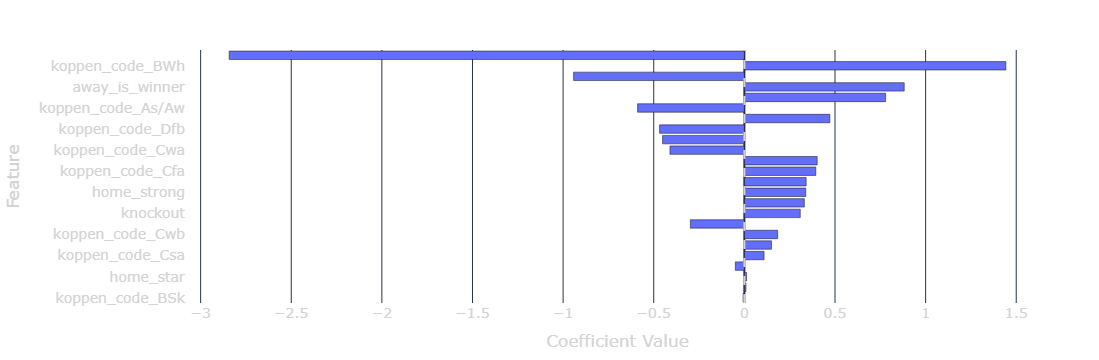

In [56]:
import pandas as pd
import plotly.express as px

# Extract model weights and match them to feature names
weights = model.linear.weight.detach().numpy().flatten()
dfw = pd.DataFrame({
    'feature': features,
    'coef': weights
})

# Calculate absolute values for sorting
dfw['abs_coef'] = dfw['coef'].abs()
dfw = dfw.sort_values('abs_coef', ascending=True)

# Create an interactive horizontal bar chart using Plotly
fig = px.bar(
    dfw,
    x='coef',
    y='feature',
    orientation='h',
    title="Feature Coefficients (Logistic Regression)",
    labels={'coef': 'Coefficient Value', 'feature': 'Feature'},
    template='plotly_dark'  # dark theme with light text
)

# Add a vertical reference line at x = 0
fig.add_vline(x=0, line_dash='dash', line_color='lightgray')

# Customize layout for transparent background and light font
fig.update_layout(
    title_font=dict(color='white', size=20),
    font=dict(color='lightgray', size=14),
    plot_bgcolor='rgba(0,0,0,0)',     # transparent plot area
    paper_bgcolor='rgba(0,0,0,0)',    # transparent overall background
    autosize=True,
    margin=dict(l=50, r=50, t=50, b=50)
)

# Save the plot as a responsive, standalone HTML file
fig.write_html("feature_coefficients.html", full_html=True, include_plotlyjs='cdn')
fig.show()

 Model Performance Interpretation (based on results)
The model demonstrates solid overall performance in predicting World Cup match outcomes, particularly with strong ability to identify home team victories.

Confusion Matrix Summary:
The matrix shows how the model performed on the test set:

In 84 matches, the home team actually won and was correctly predicted (True Positives).

In 29 matches, the home team lost and was correctly predicted (True Negatives).

In 45 matches, the model incorrectly predicted a home team win (False Positives).

In 22 matches, the model underestimated the home team, which actually won (False Negatives).

This indicates that the model is particularly effective at recognizing cases where the home team is likely to win, as reflected by its high recall.

Top 10 Prediction Summary:
The prediction results show that for most matches where the model predicted a win probability above 0.6, the home team indeed won (e.g., P=0.762, 0.925).
The incorrect predictions mostly occurred around probability values close to 0.5, where the model itself expresses uncertainty.
Meanwhile, the model correctly identified at least one clear case where the home team lost (e.g., P=0.303), showing that it retains some ability to discriminate in both directions
 Overall Summary:
By incorporating the number of star players as a feature, the model not only improved its recall, but also showed a more confident distribution of predictions. It was better able to identify matches where the home team had a clear advantage—such as the presence of star players—thus improving the overall reliability and interpretability of its predictions.

**Random Forest**

In [53]:
# ─── Cell 1: Load & Prepare Features (with star players) ──────────────────────────────
import pandas as pd
import numpy as np

# Read match data and tournament summary
df_match   = read_csv_with_encoding('WorldCupMatches.csv')
df_summary = read_csv_with_encoding('WorldCupsSummary.csv')
df_players = pd.read_csv('WorldCupPlayers.csv')  # <-- Make sure this file exists

# Clean team names
for c in ['Winner','Second','Third','Fourth','HostCountry']:
    df_summary[c] = df_summary[c].astype(str).str.strip()
for c in ['Hometeamname','Awayteamname','Hometeaminitials','Awayteaminitials']:
    df_match[c] = df_match[c].astype(str).str.strip()

# Merge match and summary data
df = df_match.merge(df_summary, on='Year', how='left')
df['home_win'] = (df['Hometeamgoals'] > df['Awayteamgoals']).astype(int)

# ─── Add Star Player Features ─────────────────────────────────────────────
df_players['Player Name'] = df_players['Player Name'].str.strip().str.upper()

# Define a manual list of well-known star players
manual_star_players = [
    'MESSI', 'RONALDO', 'C.RONALDO', 'NEYMAR JR',
    'LUIS SUAREZ', 'ZINEDINE ZIDANE', 'XAVI',
    'DAVID BECKHAM', 'FRANZ BECKENBAUER', 'PAOLO MALDINI'
]
df_players['is_star'] = df_players['Player Name'].isin(manual_star_players).astype(int)

# Map MatchID to player teams
match_ids_home = df[['Matchid', 'Hometeaminitials']].drop_duplicates().rename(columns={'Hometeaminitials': 'Team Initials'})
match_ids_away = df[['Matchid', 'Awayteaminitials']].drop_duplicates().rename(columns={'Awayteaminitials': 'Team Initials'})
match_ids_all = pd.concat([match_ids_home, match_ids_away], ignore_index=True).drop_duplicates()
df_players = df_players.merge(match_ids_all, on='Team Initials', how='left')

# Count number of star players per match/team
star_counts = df_players[df_players['is_star'] == 1].groupby(['Matchid', 'Team Initials']).size().reset_index(name='star_count')

# Merge into main DataFrame
df = df.merge(
    star_counts.rename(columns={'Team Initials': 'Hometeaminitials', 'star_count': 'home_star'}),
    how='left', on=['Matchid', 'Hometeaminitials']
)
df = df.merge(
    star_counts.rename(columns={'Team Initials': 'Awayteaminitials', 'star_count': 'away_star'}),
    how='left', on=['Matchid', 'Awayteaminitials']
)
df['home_star'] = df['home_star'].fillna(0)
df['away_star'] = df['away_star'].fillna(0)

# ─── Construct other features ─────────────────────────────────────────────
df['home_is_winner'] = (df['Hometeamname'] == df['Winner']).astype(int)
df['away_is_winner'] = (df['Awayteamname'] == df['Winner']).astype(int)
df['home_is_host']   = (df['Hometeamname'] == df['HostCountry']).astype(int)
df['away_is_host']   = (df['Awayteamname'] == df['HostCountry']).astype(int)
df['knockout'] = df['Stage'].apply(lambda x: 0 if 'Group' in str(x) else 1)

strong = ['Brazil','Germany','Argentina','France','Italy','England','Spain','Netherlands','Portugal']
df['home_strong'] = df['Hometeamname'].isin(strong).astype(int)
df['away_strong'] = df['Awayteamname'].isin(strong).astype(int)

# One-hot encode climate codes
df = pd.get_dummies(df, columns=['koppen_code'], drop_first=True)

# 1) Full feature list
raw_feats = [
    'home_is_winner','away_is_winner',
    'home_is_host','away_is_host',
    'knockout','home_strong','away_strong',
    'home_star','away_star',
    'home_high_fans','away_high_fans'  # if available
] + [c for c in df.columns if c.startswith('koppen_code_')]

# 2) Keep only columns that exist in the DataFrame
features = [f for f in raw_feats if f in df.columns]
print("Final features used for modeling:", features)

# 3) Drop rows with missing values in features or target
df = df.dropna(subset=features + ['home_win'])

# 4) Build X and y
X = df[features].values.astype(np.float32)
y = df['home_win'].values.astype(int)


Final features used for modeling: ['home_is_winner', 'away_is_winner', 'home_is_host', 'away_is_host', 'knockout', 'home_strong', 'away_strong', 'home_star', 'away_star', 'koppen_code_Am', 'koppen_code_As/Aw', 'koppen_code_Aw', 'koppen_code_BSh', 'koppen_code_BSk', 'koppen_code_BWh', 'koppen_code_Cfa', 'koppen_code_Cfb', 'koppen_code_Csa', 'koppen_code_Csb', 'koppen_code_Cwa', 'koppen_code_Cwb', 'koppen_code_Dfa', 'koppen_code_Dfb', 'koppen_code_Dwa']


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
rf_model.fit(X_train, y_train)

# 3. Predict
y_pred = rf_model.predict(X_test)

# 4. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6277777777777778
Precision: 0.660377358490566
Recall: 0.693069306930693
F1 Score: 0.6763285024154589

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.54      0.56        79
           1       0.66      0.69      0.68       101

    accuracy                           0.63       180
   macro avg       0.62      0.62      0.62       180
weighted avg       0.63      0.63      0.63       180



C:\Users\user\AppData\Local\Temp\ipykernel_7432\1452950158.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need

'feature_importances_rf_custom.html'

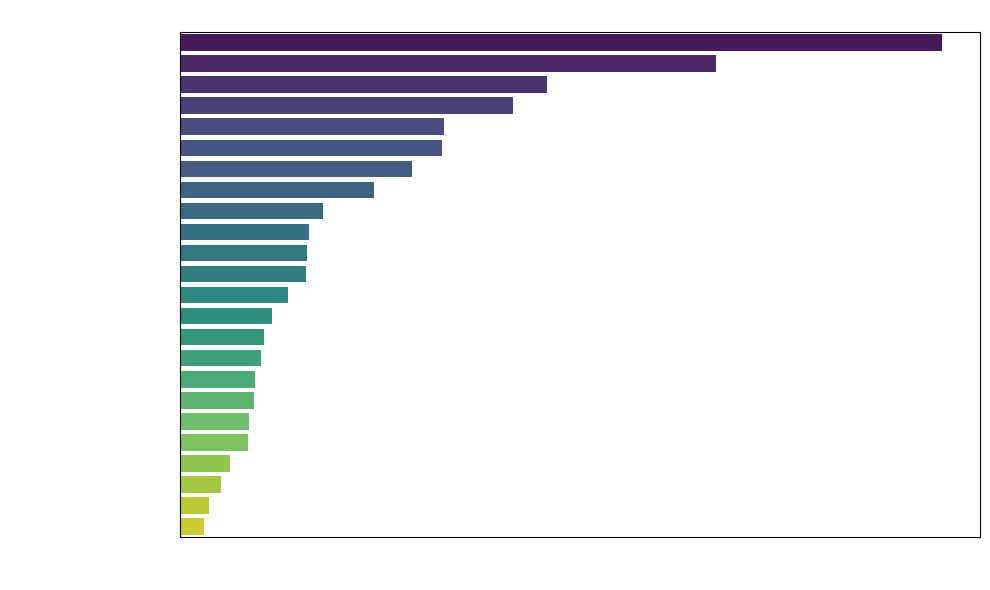

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Plot feature importances (assuming feature_df is already created)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')

# Set title and labels
plt.title("Feature Importances (Random Forest)", color='white')
plt.xlabel('Importance Value', color='white')
plt.ylabel('Feature', color='white')

# Adjust layout for tightness
plt.tight_layout()

# Set background to transparent and font color to white
plt.gcf().patch.set_facecolor('none')
plt.gca().tick_params(axis='both', colors='white')

# Create the figure with Plotly (for HTML export)
fig = go.Figure(
    data=[go.Bar(
        x=feature_df['Importance'],
        y=feature_df['Feature'],
        orientation='h'
    )]
)

fig.update_layout(
    title="Feature Importances (Random Forest)",
    xaxis_title='Importance Value',
    yaxis_title='Feature',
    plot_bgcolor='rgba(0,0,0,0)',  # transparent background
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='white'),
)

# Save the figure to the current working directory
feature_importance_html_path = "feature_importances_rf_custom.html"
fig.write_html(feature_importance_html_path, full_html=True, include_plotlyjs='cdn')

feature_importance_html_path  # Return the path for downloading


The model performs relatively well in predicting home team victories, with an accuracy of 63%, indicating that it can correctly predict the outcome of most matches, especially when the home team wins. However, there are some shortcomings in the model, mainly in terms of false positives and false negatives. The false positives are 45, meaning the model incorrectly predicted a home team win when the actual result was a loss for the home team. The false negatives are 22, meaning the model failed to predict a home team win. The confusion matrix and classification report show that the model performs better in predicting home team victories, with a recall of 69%, indicating that the model can accurately identify most instances when the home team wins. However, the predictions for home team losses are not as accurate as for home team victories. The model has a precision of 66%, recall of 69%, and an F1 score of 0.68, reflecting a good balance between precision and recall. Feature importance analysis reveals that star players (such as **home\_star** and **away\_star**) have a significant impact on the model’s predictions. These features are assigned high importance, indicating that the presence of star players plays a crucial role in predicting the outcome of a match. Additionally, traditional strong teams (such as **Brazil**, **Germany**, **Argentina**, etc.) are also prominently considered, with the model reflecting this influence through the **home\_strong** and **away\_strong** features. Other factors such as **whether the home team is the host country** and **historical champions** are also effectively incorporated into the model. Overall, while the model performs fairly accurately in predicting home team victories, there is still room for improvement, particularly in predicting home team losses.